In [1]:
from dedalus import public as de
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from matplotlib import animation
import h5py
de.logging_setup.rootlogger.setLevel('ERROR')
%matplotlib inline

In [2]:
dx, dy = 0.1/256., 0.15/256.

x, y = np.mgrid[slice(0, 0.1, dx), slice(0, 0.15, dy)]

In [3]:
y

array([[ 0.        ,  0.00058594,  0.00117187, ...,  0.14824219,
         0.14882813,  0.14941406],
       [ 0.        ,  0.00058594,  0.00117187, ...,  0.14824219,
         0.14882813,  0.14941406],
       [ 0.        ,  0.00058594,  0.00117187, ...,  0.14824219,
         0.14882813,  0.14941406],
       ..., 
       [ 0.        ,  0.00058594,  0.00117187, ...,  0.14824219,
         0.14882813,  0.14941406],
       [ 0.        ,  0.00058594,  0.00117187, ...,  0.14824219,
         0.14882813,  0.14941406],
       [ 0.        ,  0.00058594,  0.00117187, ...,  0.14824219,
         0.14882813,  0.14941406]])

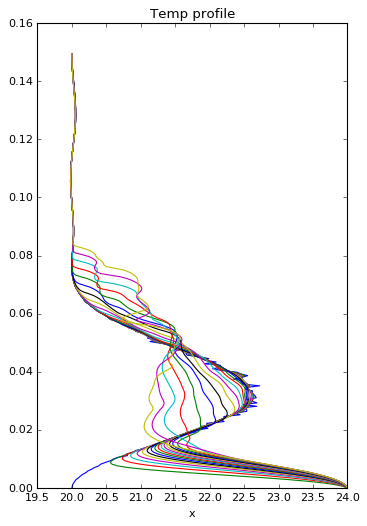

In [6]:
fig = plt.figure()

with h5py.File("temp_salinity_7x2pm/temp_salinity_7x2pm_s1.h5", mode='r') as file:
    T = file['tasks']['T']
    ρ = file['tasks']['ρ']
    s = file['tasks']['s']
    v = file['tasks']['v']
    t = file['scales']['sim_time']
    s_p = file['tasks']['s profile']
    T_p = file['tasks']['T profile']
    xp = file['scales']['x']
    yp = file['scales']['y']
    
    plt.figure(figsize=(5,7.5))
    for i in range(0, 100, 5):
        plt.plot(T_p[i,0,:], y[0,:], label = str(t[i]))
    plt.title('Temp profile')
    plt.xlabel('x')

------

In [24]:
def extraer_datos(nombre_h5):

    with h5py.File(nombre_h5, 'r') as hdf:
        base_items = list(hdf.items())
        #print(base_items, '\n')
        tasks = hdf.get('tasks')
        scales = hdf.get('scales')

        T = np.array(tasks.get('T'))
        ρ = np.array(tasks.get('ρ'))
        s = np.array(tasks.get('s'))
        v = np.array(tasks.get('v'))
        s_p = np.array(tasks.get('s profile'))
        T_p = np.array(tasks.get('T profile'))
        
        t = np.array(scales.get('sim_time'))
        #x = np.array(scales.get('x'))
        #y = np.array(scales.get('y'))
        
        return {'T': T, 'ρ': ρ, 's': s, 'v': v, 's_p': s_p, 'T_p': T_p, 'time': t, 'x': x, 'y': y}

# Análisis `temp_salinity_7x2pm`
#### Parámetros
- ρ0 = 1003.63 kg/m^3
- s0 = 8.5 0/00
- sb = 8.5
- T0 = 20 ºC
- Tb = 24 ºC
- Re = 100
- **Sc = 1**
- Perturbación $=6\times 10 ^7$  

In [25]:
file_s1_7x2 = "temp_salinity_7x2pm/temp_salinity_7x2pm_s1.h5"
file_s2_7x2 = "temp_salinity_7x2pm/temp_salinity_7x2pm_s2.h5"
file_s3_7x2 = "temp_salinity_7x2pm/temp_salinity_7x2pm_s3.h5"

In [34]:
s1_7x2 = extraer_datos(file_s1_7x2)
s2_7x2 = extraer_datos(file_s2_7x2)
s3_7x2 = extraer_datos(file_s3_7x2)

In [27]:
s1.keys()

dict_keys(['ρ', 's_p', 'x', 'y', 'v', 'time', 'T_p', 's', 'T'])

In [41]:
s1_7x2['T_p'].shape

(200, 1, 256)

In [44]:
y[0]

(256,)

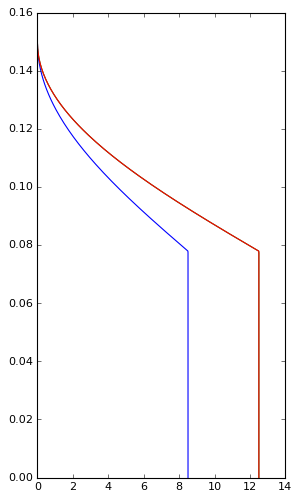

In [52]:
plt.figure(figsize=(4, 7.5))
plt.plot(s1_7x2['s_p'][0, 0, :], y[0])
plt.plot(s1_8x9['s_p'][0, 0, :], y[0])
plt.plot(s1_8x12['s_p'][0, 0, :], y[0])

------
# Análisis `temp_salinity_8x0am`
#### Parámetros
- ρ0 = 1006.75
- s0 =12.5
- sb = 12.5
- T0 = 20ºC
- Tb = 24ºC
- Re = 100
- **Sc = 1**
- Perturbación $=1\times 10 ^7$  

-----
# Análisis `temp_salinity_8x9am`
#### Parámetros
- ρ0 = 1006.75
- s0 =12.5
- sb = 12.5
- T0 = 20ºC
- Tb = 24ºC
- Re = 100
- **Sc = 100**
- Perturbación $=1\times 10 ^7$  

In [35]:
file_s1_8x9 = "temp_salinity_8x9am/temp_salinity_8x9am_s1.h5"
file_s2_8x9 = "temp_salinity_8x9am/temp_salinity_8x9am_s2.h5"
file_s3_8x9 = "temp_salinity_8x9am/temp_salinity_8x9am_s3.h5"

In [36]:
s1_8x9 = extraer_datos(file_s1_8x9)
s2_8x9 = extraer_datos(file_s2_8x9)
s3_8x9 = extraer_datos(file_s3_8x9)

-----
# Análisis `temp_salinity_8x12pm`
#### Parámetros
- ρ0 = 1006.75
- s0 =12.5
- sb = 12.5
- T0 = 20ºC
- Tb = 24ºC
- Re = 100
- **Sc = 1000**
- Perturbación $=1\times 10 ^7$  

In [37]:
file_s1_8x12 = "temp_salinity_8x12pm/temp_salinity_8x12pm_s1.h5"
file_s2_8x12 = "temp_salinity_8x12pm/temp_salinity_8x12pm_s2.h5"
file_s3_8x12 = "temp_salinity_8x12pm/temp_salinity_8x12pm_s3.h5"

In [38]:
s1_8x12 = extraer_datos(file_s1_8x12)
s2_8x12 = extraer_datos(file_s2_8x12)
s3_8x12 = extraer_datos(file_s3_8x12)

-----
